# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [1]:
import pandas as pd 

df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [2]:
df.shape

(3038, 56)

### List the columns and their data types

In [3]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [4]:
# - PRIMARY_CRIME_CODE - the type of infringement 
# - DISPOSITION_TYPE - how was the prosecution resolved
# - AGREEMENT_TYPE - the type of agreement reached 
# - COUNTRY - country which hosted the company/corporation
# - FINE - us dollars amount
# - TOTAL_PAYMENT - Sum of all monetary penalties
# - USAO - the different Attorney's Offices involved
# - PROBATION_LENGTH - Length of probation in months
# - AGREEMENT_REQUIRED_NEW_POSITIONS - post compliance positions, I think
# - INDEP_MONITOR_REQUIRED - if there needs to be independent monitoring on the compliane process 

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [5]:
pd.options.display.max_info_columns

100

## Set pandas to display 65 columns

In [6]:
pd.options.display.max_info_columns = 65

In [7]:
pd.options.display.max_info_columns

65

## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [8]:
pd.options.display.max_rows

60

In [9]:
pd.options.display.max_rows = 100
pd.options.display.max_rows

100

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [10]:
df.TOTAL_PAYMENT.agg({'min', 'mean', 'max'})

min     0.000000e+00
mean    2.284273e+07
max     4.486800e+09
Name: TOTAL_PAYMENT, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [11]:
pd.set_option("display.float_format", "{:,.2f}".format)

In [12]:
df.TOTAL_PAYMENT.agg({'min', 'mean', 'max'})

min                0.00
mean      22,842,732.11
max    4,486,800,000.00
Name: TOTAL_PAYMENT, dtype: float64

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [13]:
df.head(2)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [14]:
sum(df.JUDGMENT_DATE.value_counts()), "total trial cases"

(2532, 'total trial cases')

In [15]:
df.DISPOSITION_TYPE.value_counts().head(1)

plea    2565
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

In [16]:
%matplotlib inline

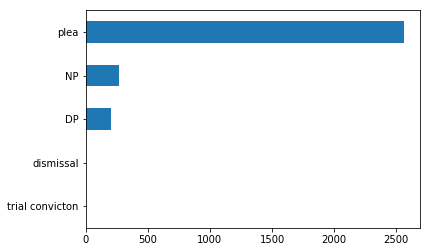

In [17]:
df.DISPOSITION_TYPE.value_counts(ascending=True).tail().plot(kind='barh')

## What's the distribution of total payments look like?

In [18]:
import matplotlib as mp

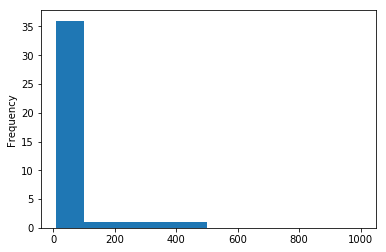

In [19]:
df.TOTAL_PAYMENT.value_counts().plot(kind='hist', by='REC_ID', bins = [10, 100, 500, 1000])

## Sort by total payments, descending

In [20]:
df.TOTAL_PAYMENT.sort_index(ascending=False)

3037       200000
3036      2350000
3035            0
3034      3798000
3033            0
3032     10500000
3031            0
3030       250000
3029       250000
3028        50000
3027     58772250
3026        35985
3025       345547
3024        86871
3023     15428207
3022        45000
3021       250000
3020     10000000
3019            0
3018        10900
3017        20000
3016    470000000
3015        10000
3014       250000
3013      2326774
3012     11000000
3011      2500000
3010         5000
3009      2500000
3008        20000
3007    233584000
3006       200000
3005            0
3004            0
3003       650000
3002        20000
3001       209030
3000         4000
2999       175000
2998        15000
2997      1789055
2996      1800000
2995      7000000
2994       200000
2993       250000
2992       250000
2991      1900000
2990        65000
2989        48478
2988     50000000
          ...    
49              0
48       80000000
47       25000000
46          75000
45        

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [21]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


In [22]:
df_new = df[['REC_ID', 'COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']]

In [23]:
#COMPANY
# - PRIMARY_CRIME_CODE - the type of infringement 
# - DISPOSITION_TYPE - how was the prosecution resolved
# - AGREEMENT_TYPE - the type of agreement reached 
# - COUNTRY - country which hosted the company/corporation
# - FINE - us dollars amount
# - TOTAL_PAYMENT - Sum of all monetary penalties
# - USAO - the different Attorney's Offices involved
# - PROBATION_LENGTH - Length of probation in months
# - AGREEMENT_REQUIRED_NEW_POSITIONS - post compliance positions, I think
# - INDEP_MONITOR_REQUIRED - if there needs to be independent monitoring on the compliane process 

## Confirm it has 3038 rows and 5 columns

In [24]:
df_new.shape

(3038, 5)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [25]:
df_new.dtypes

REC_ID               int64
COMPANY             object
DISPOSITION_TYPE    object
TOTAL_PAYMENT        int64
DATE                object
dtype: object

In [26]:
import re

In [27]:
import numpy as np

In [28]:
df_new['year'] = df_new['DATE'].str.extract(r'(\d{4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_new['year']

0       2003
1       2005
2       2014
3       2006
4       2005
5       2001
6       2013
7       2012
8       2014
9       2014
10      2001
11      2014
12      2003
13       NaN
14      2012
15      2013
16      2011
17      2004
18      2005
19      2009
20      2016
21      2012
22      2005
23      2008
24      2010
25      2010
26      2001
27      2004
28      2004
29      2012
30      2012
31      2013
32      2006
33      2010
34      2007
35      2015
36      2006
37      2000
38      2013
39      2000
40      2010
41      2005
42      2016
43      2011
44      2008
45      2009
46      2013
47      2006
48      2004
49      2004
        ... 
2988    2006
2989    2006
2990    2005
2991    2013
2992    2003
2993    2003
2994    2006
2995    2017
2996    2017
2997    2014
2998    2007
2999    2005
3000    2008
3001    2010
3002    2007
3003    2003
3004    2011
3005    2010
3006    2002
3007    2013
3008    2008
3009    2015
3010    2011
3011    2015
3012    2013
3013    2013

## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [30]:
df_new['year'] = df_new['year'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_new.dtypes

REC_ID                int64
COMPANY              object
DISPOSITION_TYPE     object
TOTAL_PAYMENT         int64
DATE                 object
year                float64
dtype: object

## Make a histogram of cases over the years

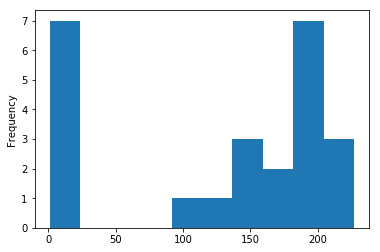

In [32]:
df_new.year.value_counts().plot(kind='hist')

## What was the total amount paid across all cases each year?

In [33]:
df_new.dtypes

REC_ID                int64
COMPANY              object
DISPOSITION_TYPE     object
TOTAL_PAYMENT         int64
DATE                 object
year                float64
dtype: object

In [34]:
df_new.TOTAL_PAYMENT.value_counts()

0            370
100000        92
500000        79
10000         73
50000         70
1000000       55
5000          51
200000        49
250000        49
25000         41
75000         35
20000         30
15000         30
2000000       29
30000         28
40000         27
150000        25
300000        25
400000        22
1500000       20
750000        19
1000          18
50            17
3000000       17
4000000       15
125000        14
60000         14
5000000       14
4000          12
600000        11
10000000      11
3000          11
50000000      11
3500000       10
24000         10
25000000      10
2500000       10
55000          9
6000000        9
450000         9
2500           9
9000000        9
35000          9
12000          9
90000          9
175000         8
15000000       8
500            8
350000         8
6000           7
            ... 
63876          1
557000         1
54000000       1
86397          1
32416          1
78000000       1
1350000        1
135535        

In [35]:
df_new.TOTAL_PAYMENT.sort_index(ascending=False).sum()

69396220163

## Graph it!

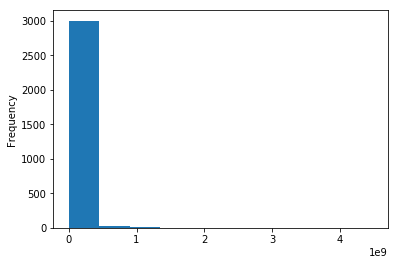

In [36]:
df_new.TOTAL_PAYMENT.sort_index(ascending=False).plot(kind='hist')  #???????

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [37]:
df.AGREEMENT_REQUIRED_NEW_POSITIONS.count()

261

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [38]:
df.AGREEMENT_REQUIRED_NEW_POSITIONS.value_counts(ascending=False).head()

No                                                                                       163
Yes; Assignment one or more senior officers to compliance, with reporting obligations     46
Yes; Compliance Officer                                                                    6
Yes; Chief Compliance Officer                                                              6
Yes; Compliance officer                                                                    3
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [39]:
import numpy as np
np.nan

nan

In [40]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].replace('', 'NaN', inplace=True)

In [41]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].replace('NaN', np.nan, inplace=True)

In [42]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'] = df['AGREEMENT_REQUIRED_NEW_POSITIONS'].astype(str)

In [43]:
df.loc[df['AGREEMENT_REQUIRED_NEW_POSITIONS'].dropna().str.contains('Yes.*'), "required_new_position"] = 'True'

In [44]:
df.loc[df['AGREEMENT_REQUIRED_NEW_POSITIONS'].dropna().str.contains('No.*'), "required_new_position"] = 'False'

### Confirm that your new column has 163 `True` values and 98 `False` values

In [45]:
df.required_new_position.value_counts()

False    165
True      96
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [46]:
df_new['year'] = df_new['DATE'].str.extract(r'(\d{4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df['new_position'] = df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.extract(r'(\s\w.*)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [48]:
df.new_position.value_counts()

 Assignment one or more senior officers to compliance, with reporting obligations                                                                                                                         46
 Compliance Officer                                                                                                                                                                                        6
 Chief Compliance Officer                                                                                                                                                                                  6
 Compliance officer                                                                                                                                                                                        3
 Appointe one employee as responsible for monitoring compliance                                                                                                                     

## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [49]:
df[df.new_position == " Compliance Officer"]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,...,"595,000,000.00",National Aeronautics and Space Administration ...,Yes,"596,900,000.00",No,"2,006.00",NaN,Information regarding the Interim Agreement: h...,True,Compliance Officer
664,587,"Columbia Farms, Inc.",DP,Immigration,No,South Carolina,United States,No,NaN,NaN,...,nan,Dept. of Homeland Security;Dept. of Homeland S...,Yes,0.00,No,"2,009.00",NaN,NaN,True,Compliance Officer
1063,51,Fisher Sand & Gravel / General Steel (subsid.)...,DP,Fraud - Tax,No,USDOJ - Tax Division,United States,No,NaN,NaN,...,nan,Dept. of the Treasury - Internal Revenue Servi...,Yes,0.00,No,"2,009.00",NaN,NaN,True,Compliance Officer
1657,609,Louis Berger Group,DP,Fraud - General,No,New Jersey,United States,Yes,NaN,NaN,...,nan,Dept. of Justice - Civil Division - Fraud Sect...,Yes,0.00,No,"2,010.00",NaN,NaN,True,Compliance Officer
1661,610,"Love Irrigation, Inc.",DP,Immigration,No,Mississippi - Southern District,United States,No,NaN,NaN,...,"1,500,000.00",Dept. of Homeland Security - Immigration & Cus...,Yes,"1,500,000.00",No,"2,012.00",NaN,NaN,True,Compliance Officer
3005,645,"Wright Medical Technology, Inc.",DP,Kickbacks,No,New Jersey,United States,No,NaN,NaN,...,"7,900,000.00",U.S. Postal Inspection Service (USPIS); Dept. ...,No,"7,900,000.00",No,"2,010.00",NaN,NaN,True,Compliance Officer


## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

In [57]:
df[df.new_position.str.contains("Compliance Officer", case=False, na=False)]



ValueError: Wrong number of items passed 58, placement implies 1

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

In [51]:
#its all good, no?

## What were the most popular crimes that required a compliance officer's appointment?

In [52]:
PRIMARY_CRIME_CODE

NameError: name 'PRIMARY_CRIME_CODE' is not defined

In [58]:
df.groupby('PRIMARY_CRIME_CODE')['required_new_position'].value_counts().sort_values(ascending = False).tail(13)

PRIMARY_CRIME_CODE                        required_new_position
Controlled substances / Drugs / Meth Act  False                    2
Other                                     True                     2
Food                                      False                    2
Fraud - Accounting                        False                    2
                                          True                     2
Food                                      True                     1
OSHA / Workplace Safety / Mine Safety     False                    1
Environmental                             True                     1
OSHA / Workplace Safety / Mine Safety     True                     1
Fraud - Securities                        True                     1
Bank Secrecy Act                          True                     1
Obstruction of Justice                    False                    1
Wildlife                                  False                    1
Name: required_new_position, dtype: int

In [54]:
df.groupby("PRIMARY_CRIME_CODE")[compliance].value_counts().groupby(level=0).head(1)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

In [59]:
df['USAO'].value_counts().sort_values(ascending = False)

USDOJ - Antitrust Division                                                                                                                            149
Florida - Southern District                                                                                                                           125
USDOJ - Criminal Division - Fraud Section                                                                                                              93
USDOJ - Tax Division                                                                                                                                   76
New Jersey                                                                                                                                             72
Florida - Middle District                                                                                                                              69
Louisiana - Eastern District                                                

In [60]:
df3 = df[df['USAO'].str.contains(".*Georgia", case = False, na=False).sort_values(ascending = False)]
df3

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN,NaN,NaN
52,842,ARG Associates Inc.,plea,Fraud - General,NaN,Georgia - Northern District,United States,No,USA v. Rodwell et al,1:00-cr-00370,...,nan,NaN,NaN,nan,NaN,"2,001.00",PACER,NaN,NaN,NaN
90,866,Affinity International Inc.,plea,Fraud - General,NaN,Georgia - Northern District,United States,No,USA v. Affinity Intl. Inc.,1:02-cr-00724,...,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN,NaN,NaN
144,896,Allergan,plea,FDCA / Pharma,NaN,Georgia - Northern District,United States,No,USA v. Allergan Inc.,1:10-cr-00375,...,nan,NaN,NaN,nan,NaN,"2,010.00",PACER,NaN,NaN,NaN
202,921,Amyn Motors Inc.,plea,Bank Secrecy Act,NaN,Georgia - Northern District,United States,No,USA v. Amyn Motors Inc.,1:11-CR-00364,...,nan,NaN,NaN,nan,NaN,"2,011.00",PACER,NaN,NaN,NaN
209,927,Aneri Corp.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. Aneri Corp.,4:06-cr-00036,...,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN,NaN,NaN
265,3136,"Atlanta Medical Center, Inc.",plea,Fraud - General,NaN,USDOJ - Criminal Division - Fraud Section|Geor...,United States,No,"USA v. ATLANTA MEDICAL CENTER, INC. ET AL",1:16-cr-00350,...,nan,NaN,NaN,nan,NaN,"2,016.00",PACER,NaN,NaN,NaN
299,980,BDGK Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. BDGK Inc.,4:05-cr-00092,...,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN,NaN,NaN
316,986,Babuben Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,"Georgia - Northern District,New York - Eastern...",United States,No,USA v. Babuben Inc.,4:06-cr-00035,...,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN,NaN,NaN
379,1007,Beaulieu Group LLC,plea,Environmental,NaN,Georgia - Northern District,United States,No,USA v. Beaulieu Group LLC,4:07-cr-00014,...,nan,NaN,NaN,nan,NaN,"2,007.00",PACER,NaN,NaN,NaN


In [61]:
df3.groupby('PRIMARY_CRIME_CODE')['DATE']